In [1]:
# This pandas script produces a number of charts that summarize an analysis of the relationship
#   among a number of factors, including: average fare, number of rides and number of drivers per city along
#   with the numbder of drivers per city.
# The analysis is based on detailed ride and city-level info contained in two files under the raw_data folder.
#
# More detailed info on each cell block that prodcues a report, is contained in comments below.

In [ ]:
# Observations
1. Urban areas generated the balk of revenue (63%), had the largest share of the number of rides(YY%) and employed most of the drivers (ZZ%).
2. Although rural areas did worst based on all the measures above, they produced the highes average fare per ride.
    - This could be due to fewer drivers available or longer distances traveled.
    - These consdierations require additional info for further analysis.
3. An ROI analysis of various markets is warranted to determine if a consolidation strategy is more appropriate.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Create a reference the CSV file desired
csv_path1 = "raw_data/city_data.csv"
csv_path2 = "raw_data/ride_data.csv"

# Read the CSV files into Pandas Data Frames (df)
city_df = pd.read_csv(csv_path1)
ride_df = pd.read_csv(csv_path2)

# Merge the two data sets into a single data frame (df), based on City
total_df = pd.merge(ride_df, city_df, on='city')
total_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [4]:
# Generate a data frame containing summary city-level info:
#   Type, number of rides, average fare and number of drivers.
# Perform this using groupby() and various summary functions.
t = total_df.groupby('city')['type'].first()
x = total_df.groupby('city')['city'].count()
y = total_df.groupby('city')['fare'].mean()
z = total_df.groupby('city')['driver_count'].first()
city_grouped_df = pd.concat([t, x, y, z], axis=1)

# Rename a number of columns to remove embedded space characters.
city_grouped_df = city_grouped_df.rename(columns={'city':'num_rides'})
city_grouped_df = city_grouped_df.rename(columns={'fare':'avg_fare'})
city_grouped_df.to_csv('raw_data/city_grouped2.csv')
city_grouped_df.head()

,type,num_rides,avg_fare,driver_count
city,,,,
Alvarezhaven,Urban,31,23.928710,21
Alyssaberg,Urban,26,20.609615,67
Anitamouth,Suburban,9,37.315556,16
Antoniomouth,Urban,22,23.625000,21
Aprilchester,Urban,19,21.981579,49


# First Part
## Bubble chart relating Average Fare, Number of Rides, Number of Drivers and Type of City

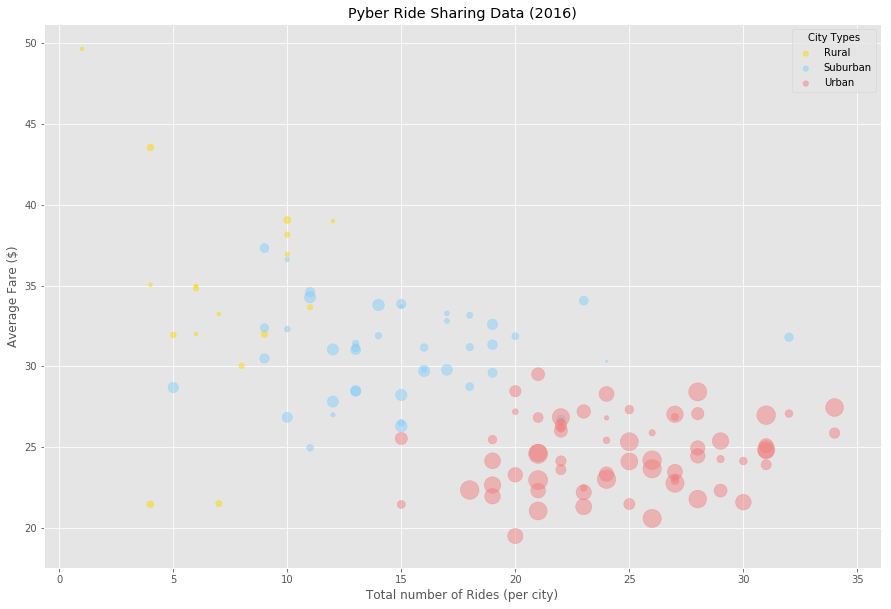

In [5]:
def apply_color(x):
    if x == 'Urban': return 'lightcoral'
    elif x == 'Suburban': return 'lightskyblue'
    else: return 'gold'    

# Initialize various variables and settings
color = []
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

# For each service area type, produce a data frame that contains summary info derived from aggregating city-levle
#   info contained in the city group df:
for i in ('Rural', 'Suburban', 'Urban'):
    type_df = city_grouped_df.loc[city_grouped_df['type'] == i, :]
    x = pd.Series(type_df['num_rides'])
    y = pd.Series(type_df['avg_fare'])
    z = pd.Series(type_df['driver_count'])
    color = []                # Color list needs to be reset in each iteration
    for j in range(len(x)):   #   and initialized for the rigth number of times (corresponding to number of x-axis data points)
        color.append(apply_color(i))
    plt.scatter(x, y, s=z*5, c=color, label=i, alpha=0.5)

# Establish a legend, title and axis labels for the plot
lgnd = plt.legend(loc="upper right", title='City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.xlabel("Total number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
# Display the plot
plt.show()

In [6]:
# Using the data frame containing city level summary data, calculate average per ride fare for the 3 types
#   of service areas: urban, suburban and rural.
urban_df = city_grouped_df.loc[city_grouped_df['type'] == 'Urban', :]
surban_df = city_grouped_df.loc[city_grouped_df['type'] == 'Suburban', :]
rural_df = city_grouped_df.loc[city_grouped_df['type'] == 'Rural', :]

avg_urban_fare = urban_df['avg_fare'].mean()
avg_urban_rides = urban_df['num_rides'].mean()
avg_urban_fare_per_ride = avg_urban_fare / avg_urban_rides

avg_surban_fare = surban_df['avg_fare'].mean()
avg_surban_rides = surban_df['num_rides'].mean()
avg_surban_fare_per_ride = avg_surban_fare / avg_surban_rides

avg_rural_fare = rural_df['avg_fare'].mean()
avg_rural_rides = rural_df['num_rides'].mean()
avg_rural_fare_per_ride = avg_rural_fare / avg_rural_rides

print ("Average per ride fare generated by rural (" + str(avg_urban_fare_per_ride) + "), suburban (" + 
       str(avg_surban_fare_per_ride) + ") and urban (" + str(avg_rural_fare_per_ride) + ") areas.")

Average per ride fare generated by rural (0.9993005477070626), suburban (2.059246652088649) and urban (4.891921431577682) areas.


# Second Part
## Various Pie Charts 

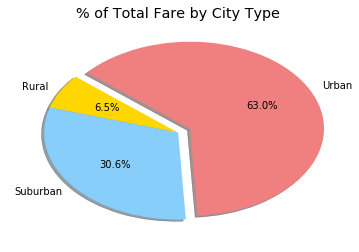

In [7]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
type_grp = total_df.groupby('type')
sizes = type_grp['fare'].sum()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the Urban section from the other two
explode = (0, 0, 0.1)
# Create the pie chart based upon the values above
# Automatically find the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fare by City Type")
plt.show()

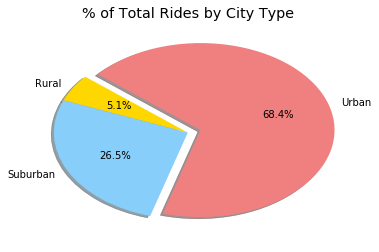

In [8]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
type_grp = total_df.groupby('type')
sizes = type_grp['fare'].count()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the Urban section from the others
explode = (0, 0, 0.1)
# Create the pie chart based upon the values above
# Automatically find the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

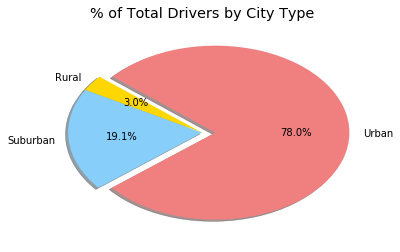

In [9]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
type_grp = city_grouped_df.groupby('type')
sizes = type_grp['driver_count'].sum()

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the Urban section from the others
explode = (0, 0, 0.1)
# Create the pie chart based upon the values above
# Automatically find the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()